In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random      
import copy
from matplotlib import animation
import math

In [2]:
# 参数设置

In [3]:
value_range = 10
population_size = 30
dim = 2
iter_num = 50
lamuda = 1
beta = 1.5
pa = 0.25

In [4]:
# 初始化粒子

In [5]:
def init_nest():
    random.seed()
    X = np.zeros((population_size,dim))
    for i in range(population_size):
        for j in range(dim):
            X[i][j] = random.random()*2*value_range-value_range
    return X

In [6]:
# 代价函数

In [7]:
def rastrigin(x):
    Z = 10 * dim
    for i in range(dim):
        Z = Z + x[i] ** 2 - 10 * np.cos(2 * np.pi * x[i])
    return Z

In [8]:
# 控制点在范围内

In [9]:
def project(x):
    for i in range(len(x)):
        if x[i] > value_range:
            x[i] = value_range
        elif x[i] < -value_range:
            x[i] = -value_range
    return x

In [10]:
# 莱维飞行

In [11]:
def GetNewNestViaLevy(Xt,Xbest):
    sigma_u = (math.gamma(1 + beta) * math.sin(math.pi * beta / 2) / (
                math.gamma((1 + beta) / 2) * beta * (2 ** ((beta - 1) / 2)))) ** (1 / beta)
    sigma_v = 1
    for i in range(population_size):
        s = Xt[i,:]
        u = np.random.normal(0, sigma_u, 1)
        v = np.random.normal(0, sigma_v, 1)
        Ls = u / ((abs(v)) ** (1 / beta))
        stepsize = lamuda*Ls*(s-Xbest)   #lamuda的设置关系到点的活力程度  方向是由最佳位置确定的  有点类似PSO算法  但是步长不一样
        s = s + stepsize * np.random.randn(1, len(s))  #产生满足正态分布的序列
        Xt[i,:] = s
        project(Xt[i])
    return Xt

In [12]:
# 抛弃巢穴

In [13]:
def empty_nests(nest, best_pos):
    ori_nest = copy.deepcopy(nest)
    ori_nest = np.delete(ori_nest,best_pos,0)
    nest1 = copy.deepcopy(ori_nest)
    nest2 = copy.deepcopy(ori_nest)
    rand_m = pa - np.random.rand(population_size-1,dim)
    rand_m = np.heaviside(rand_m,0)
    np.random.shuffle(nest1)
    np.random.shuffle(nest2)
    stepsize = np.random.rand(1,1) * (nest1 - nest2)
    new_nest = ori_nest + stepsize * rand_m
    new_nest = np.append(new_nest, [nest[best_pos]], axis=0)
    for i in range(population_size):
        project(new_nest[i])
    return new_nest

In [14]:
# 获取最优巢穴

In [15]:
def get_best_nest(nest, newnest,best_aff,nest_best):
    best_pos = 0
    for i in range(population_size):
        temp1 = rastrigin(nest[i,:])
        temp2 = rastrigin(newnest[i,:])
        if temp1 > temp2:
            nest[i, :] = newnest[i,:]
            if temp2 < best_aff :
                best_aff = temp2
                nest_best = nest[i,:]
                best_pos = i
    return  nest, best_aff, nest_best, best_pos

In [16]:
# CS

In [17]:
 def Get_CS():
    best_aff_arr = []
    x_arr = []
    best_pos_arr = []
    print('--------------初始化------------')
    nest = init_nest()
    nest_best = nest[0,:]
    best_aff =rastrigin(nest_best)
    nest ,best_aff, nest_best, best_pos = get_best_nest(nest,nest,best_aff,nest_best)
    best_aff_arr.append(best_aff)
    x_arr.append(copy.deepcopy(nest))
    best_pos_arr.append(copy.deepcopy(nest_best))
    for i in range(iter_num):
        print('--------------第'+str(i+1)+'步------------')
        nest_c = copy.deepcopy(nest)
        newnest = GetNewNestViaLevy(nest_c, nest_best) # 根据莱维飞行产生新的位置
        nest,best_aff, nest_best, best_pos = get_best_nest(nest, newnest,best_aff, nest_best) # 判断新的位置优劣进行替换
        nest_e = copy.deepcopy(nest)
        newnest = empty_nests(nest_e,best_pos) #丢弃部分巢穴
        nest,best_aff, nest_best, best_pos = get_best_nest(nest,newnest, best_aff, nest_best)  # 再次判断新的位置优劣进行替换
        best_aff_arr.append(best_aff)
        x_arr.append(copy.deepcopy(nest))
        best_pos_arr.append(copy.deepcopy(nest_best))
        print('最佳的适应度值为：',best_aff)
        print('粒子到过最优位置为：',nest_best)
    print('达到终止条件，运行结束')        
    print("最优解的适应度函数值",best_aff)
    return  best_aff_arr,x_arr,best_pos_arr,best_aff

In [33]:
best_aff_arr,x_arr,best_pos_arr,best_aff = Get_CS()

--------------初始化------------
--------------第1步------------
最佳的适应度值为： 22.14708023730132
粒子到过最优位置为： [-0.46635801  0.91761361]
--------------第2步------------
最佳的适应度值为： 22.14708023730132
粒子到过最优位置为： [-0.46635801  0.91761361]
--------------第3步------------
最佳的适应度值为： 0.7225823112649454
粒子到过最优位置为： [ 0.02756862 -0.05396015]
--------------第4步------------
最佳的适应度值为： 0.7225823112649454
粒子到过最优位置为： [ 0.02756862 -0.05396015]
--------------第5步------------
最佳的适应度值为： 0.7225823112649454
粒子到过最优位置为： [ 0.02756862 -0.05396015]
--------------第6步------------
最佳的适应度值为： 0.44311619755323584
粒子到过最优位置为： [ 0.02756862 -0.03850427]
--------------第7步------------
最佳的适应度值为： 0.44311619755323584
粒子到过最优位置为： [ 0.02756862 -0.03850427]
--------------第8步------------
最佳的适应度值为： 0.44311619755323584
粒子到过最优位置为： [ 0.02756862 -0.03850427]
--------------第9步------------
最佳的适应度值为： 0.44311619755323584
粒子到过最优位置为： [ 0.02756862 -0.03850427]
--------------第10步------------
最佳的适应度值为： 0.40872284374225387
粒子到过最优位置为： [-0.04455999 -0.00935312]
------

<IPython.core.display.Javascript object>


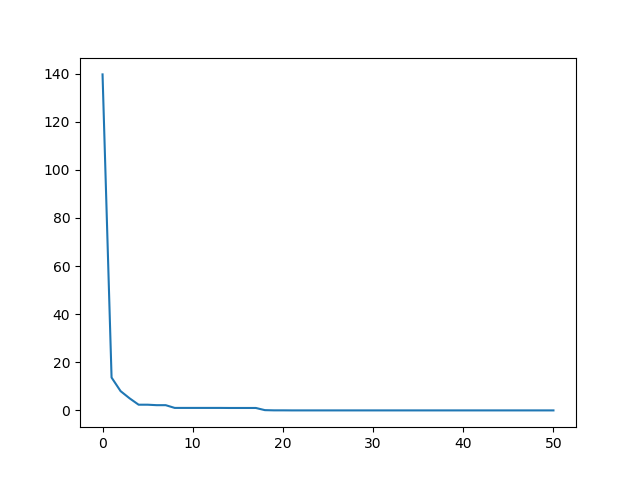

In [20]:
%matplotlib notebook 
plt.plot(best_aff_arr)
plt.show()

<IPython.core.display.Javascript object>


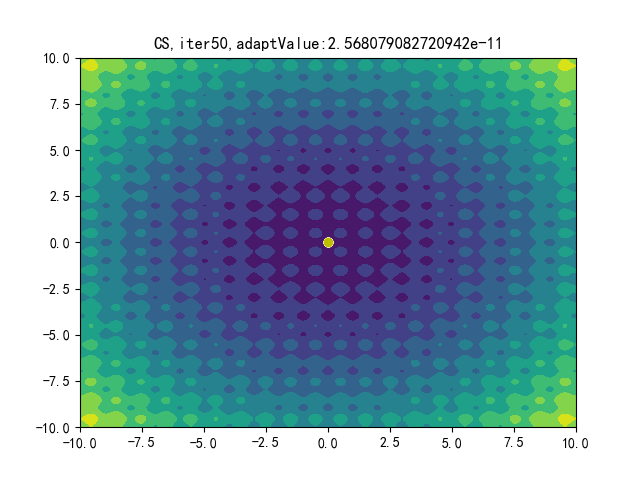

In [21]:
%matplotlib notebook 
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
fig, ax = plt.subplots()
xdata = x_arr
best_data = best_pos_arr
n = 500
x = np.linspace(-value_range, value_range, n)
y = np.linspace(-value_range, value_range, n)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, rastrigin([X,Y]))
point1, = plt.plot(xdata[0][:,0],xdata[0][:,1], 'wo')
point2, = plt.plot(best_data[0][0],best_data[0][1], 'yo')

def init():
    ax.set_xlim(-value_range, value_range)
    ax.set_ylim(-value_range, value_range)

def update(frame):  # 帧
    point1.set_data(xdata[frame][:,0],xdata[frame][:,1])
    point2.set_data(best_data[frame][0],best_data[frame][1])
    i = frame
    a = rastrigin(best_data[frame])
    ax.set_title('CS,iter'+str(i)+',adaptValue:'+str(a),loc = 'center')
    return point1,point2

ani = animation.FuncAnimation(
    fig=fig,
    func=update,
    frames=range(len(x_arr)),
    init_func=init,
    interval=500,  # 时间间隔: 毫秒
    repeat=False)


plt.show()
ani.save('CS.gif',writer='pillow')